## Week 10. NLP and Text Analytics

### **Text Mining / Text Analytics**

- **Extract Key Messages:** Identifying and extracting the most important information from a text.
- **Summarize Documents:** Creating concise summaries that capture the essential points of a document.
- **Detect Patterns in Text:** Analyzing text to discover patterns, trends, and relationships.
- **Automate Text Processing:** Reducing the need for human cognitive processing of large volumes of text through automation.

### **Examples of Text Analytics**

- **Document Clustering:** Grouping similar documents together (e.g., news article aggregators) using unsupervised learning.
- **Sentiment Analysis:** Determining the sentiment expressed in a text (e.g., positive, negative, neutral) through supervised learning (requires labeled data).
- **Topic Modeling:** Identifying topics in a collection of documents.

### **Examples of Natural Language Processing (NLP)**

- **Machine Translation:** Automatically translating text from one language to another using advanced models like Transformers (e.g., Google's BERT, OpenAI's GPT).
- **Speech Recognition:** Converting spoken language into text using technologies like ASR (Automatic Speech Recognition).
- **Conversational AI and Chatbots:** Creating systems that can understand and respond to human language, powered by advanced language models (e.g., GPT-4, OpenAI's ChatGPT).
- **Named Entity Recognition (NER):** Identifying and classifying entities (e.g., names of people, organizations, locations) within a text.
- **Text Generation:** Automatically generating coherent and contextually relevant text (e.g., content creation, automated reporting).



### **Key Challenges in NLP**

#### 1. Feature Engineering

- **Handling Unstructured Data:** Text is inherently unstructured, making it challenging to process and analyze using traditional computational methods.
- **Numerical Representation:** Machine learning models require numerical inputs, necessitating the conversion of text into numerical arrays.
- **Effective Feature Engineering:** Identifying and engineering the right features from text data is crucial for the performance of NLP models.

- **Solution: Vectorization Techniques** Converting text into structured numerical representations using methods such as:
  - **Bag of Words (BoW):** Representing text as a set of word occurrences.
  - **TF-IDF (Term Frequency-Inverse Document Frequency):** Weighing the importance of words based on their frequency and rarity.
  - **Word Embeddings:** Capturing semantic meaning and relationships between words using techniques like Word2Vec, GloVe, and fastText.
  - **Contextual Embeddings:** Leveraging state-of-the-art models such as BERT, GPT, and Transformer-based models to create contextualized word representations.


#### 2. Maintaining Context

- **Ambiguity and Polysemy:** Dealing with words that have multiple meanings and context-dependent interpretations.
- **Unspoken component:** Recognizing emotion, sentiment, humour, irony.
- **Out-of-Vocabulary (OOV) Words:** Managing words that were not seen during the training phase.
- **Bias and Fairness:** Ensuring that NLP models do not perpetuate or amplify biases present in the training data.
- **Maintaining context through a conversation:** Pronoun resolution, temporal understanding, 
- **Solution: State-of-the-Art Techniques**

    - **Deep Learning:** Employing neural networks to capture complex patterns and relationships in text data.
    - **Transformers and Attention Mechanisms:** Modern NLP models like BERT, GPT, and T5 leverage transformers and attention mechanisms for better performance and context understanding.
    - **Pre-trained Language Models:** Utilizing models pre-trained on vast datasets and fine-tuning them for specific tasks (e.g., OpenAI's GPT-4, Google's BERT).





### Getting Started with Vectorization
#### **Bag of Words (BoW)**

- **Document-Term Matrix (DTM):** A matrix representation where each row corresponds to a document and each column corresponds to a term or token (a "unit" of language), where each value is the frequency of the term in the document.
- **Feature Set:** The DTM can be used as a feature set for various machine learning models.
- **TF-IDF Transformation:** Helps in reducing the impact of frequently occurring but less informative words by assigning higher weights to rare yet significant words.

### **Document-Term Matrix (DTM) - A Step-by-Step Guide**

#### 1. Import Raw Text Data
- **Text Corpus:** Typically a list or a pandas DataFrame where each element is a document or some text example (i.e., a sentence, phrase, novel etc.).
- **Mapping:** The corpus is mapped to a dataset where each document corresponds to a row in the data.

#### 2. Data Cleaning
- **Case Standardization:** Convert all text to lowercase (e.g., `str.lower()`).
- **Remove Punctuation:** Strip punctuation marks from the text.
- **Remove Stopwords:** Eliminate common but less informative words (e.g., prepositions, pronouns).
- **Stemming/Lemmatization:** Reduce words to their base or root form.
  - **Example Process:**
    - **Raw:** _I'm flying to Calgary tomorrow. Tomorrow I have to wake up early to catch a plane to Calgary._
    - **Lowercased:** _i'm flying to calgary tomorrow. tomorrow i have to wake up early to catch a plane to calgary._
    - **Punctuation Removed:** _im flying to calgary tomorrow tomorrow i have to wake up early to catch a plane to calgary_
    - **Stopwords Removed:** _flying calgary tomorrow tomorrow wake early catch plane calgary_
    - **Stemmed:** _fli calgari tomorrow tomorrow wake earli catch plane calgari_

#### 3. Tokenization
- **Extract N-grams:**
  - **Unigrams (1-grams):** Single words (e.g., fli, calgari, tomorrow, wake, earli, catch, plane).
  - **Bigrams (2-grams):** Pairs of consecutive words (e.g., fli calgari, calgari tomorrow).
  - **Trigrams (3-grams) and beyond:** Sequences of three or more words.
  - Typically, start with unigrams for simplicity.

#### 4. Compute Frequencies
- **Term Frequencies:** Count the occurrences of each token (word or n-gram) in each document.
- **TF-IDF Transformation:** 
  - **Term Frequency (TF):** The number of times a term appears in a document.
  - **Inverse Document Frequency (IDF):** A measure of how common or rare a term is across all documents.
  - **TF-IDF Score:**
  
  
  $$\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \log\left(\frac{N}{\text{DF}(t)}\right)$$

    - _t_: Term
    - _d_: Document
    - _N_: Total number of documents
    - DF: Number of documents containing the term



<img src="../images/BoW.png" width="600" height="600">

In [1]:
# !pip install gensim nltk wordcloud==1.8.0

In [2]:
import pandas as pd
import numpy as np
import string
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.cluster import KMeans
from wordcloud import WordCloud

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB

### Quick Example

- A collection of document examples is called _Corpus_ (plural: _Corpora_)
- In Python, corpus is usually represented as a list where each element is an individual document

In [3]:
documents = [
    "She loves pizza, pizza is delicious",
    "She is a good person",
    "Good people are the best",
    "She lives in Calgary"
]
print(documents)

['She loves pizza, pizza is delicious', 'She is a good person', 'Good people are the best', 'She lives in Calgary']


In [4]:
# Function to clean text
def clean_text(doc):
    # Convert to lower case
    doc = doc.lower()
    # Remove punctuation
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    return doc

# Clean the documents
cleaned_documents = [clean_text(doc) for doc in documents]
pd.DataFrame({"raw":documents, "clean":cleaned_documents})

,raw,clean
0,"She loves pizza, pizza is delicious",she loves pizza pizza is delicious
1,She is a good person,she is a good person
2,Good people are the best,good people are the best
3,She lives in Calgary,she lives in calgary


In [5]:
cleaned_documents

['she loves pizza pizza is delicious',
 'she is a good person',
 'good people are the best',
 'she lives in calgary']

In [6]:
# Vectorization: Extract DTM (document-term matrix)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_documents)
# Get the vocabulary
vocab = vectorizer.get_feature_names_out()

In [7]:
## Here is our DTM:
pd.DataFrame(X.toarray(), columns = vocab)

,are,best,calgary,delicious,good,in,is,lives,loves,people,person,pizza,she,the
0,0,0,0,1,0,0,1,0,1,0,0,2,1,0
1,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,1,1,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [8]:
vocab

array(['are', 'best', 'calgary', 'delicious', 'good', 'in', 'is', 'lives',
       'loves', 'people', 'person', 'pizza', 'she', 'the'], dtype=object)

In [9]:
## How do we decode the DTM? Use count vectorizer's vocabulary mapping column number to a token
vocab = pd.DataFrame({'Number' : list(vectorizer.vocabulary_.values()), 'Key' : list(vectorizer.vocabulary_.keys())})
vocab.sort_values(by = 'Number', inplace = True, ignore_index=True)
vocab

,Number,Key
0,0,are
1,1,best
2,2,calgary
3,3,delicious
4,4,good
5,5,in
6,6,is
7,7,lives
8,8,loves
9,9,people


In [10]:
# Perform TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Convert to DataFrame for better visualization
dtm_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

In [11]:
tfidf_df

,are,best,calgary,delicious,good,in,is,lives,loves,people,person,pizza,she,the
0,0.000000,0.000000,0.000000,0.377184,0.000000,0.000000,0.297376,0.000000,0.377184,0.000000,0.000000,0.754368,0.240752,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.484263,0.000000,0.484263,0.000000,0.000000,0.000000,0.614226,0.000000,0.392053,0.000000
2,0.465162,0.465162,0.000000,0.000000,0.366739,0.000000,0.000000,0.000000,0.000000,0.465162,0.000000,0.000000,0.000000,0.465162
3,0.000000,0.000000,0.541736,0.000000,0.000000,0.541736,0.000000,0.541736,0.000000,0.000000,0.000000,0.000000,0.345783,0.000000


In [12]:
dtm_df

,are,best,calgary,delicious,good,in,is,lives,loves,people,person,pizza,she,the
0,0,0,0,1,0,0,1,0,1,0,0,2,1,0
1,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,1,1,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [13]:
tfidf_df

,are,best,calgary,delicious,good,in,is,lives,loves,people,person,pizza,she,the
0,0.000000,0.000000,0.000000,0.377184,0.000000,0.000000,0.297376,0.000000,0.377184,0.000000,0.000000,0.754368,0.240752,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.484263,0.000000,0.484263,0.000000,0.000000,0.000000,0.614226,0.000000,0.392053,0.000000
2,0.465162,0.465162,0.000000,0.000000,0.366739,0.000000,0.000000,0.000000,0.000000,0.465162,0.000000,0.000000,0.000000,0.465162
3,0.000000,0.000000,0.541736,0.000000,0.000000,0.541736,0.000000,0.541736,0.000000,0.000000,0.000000,0.000000,0.345783,0.000000


### Disadvantages of Bag-of-Words (BoW) and TF-IDF:

#### 1. **Loss of Context**:
    - BoW ignores the order of words in the text, which means it loses the context and semantic meaning that word order can provide. For example, "dog bites man" and "man bites dog" would have the same representation.

**Solution**:
    - **Word Embeddings (e.g., Word2Vec, GloVe)**: These models capture semantic relationships between words by training on large corpora to produce dense vector representations that preserve the context.
    - **Contextualized Embeddings (e.g., BERT, GPT)**: Models like BERT and GPT generate word embeddings that take into account the context in which words appear. They are able to distinguish between different meanings of the same word based on surrounding text.

#### 2. **High Dimensionality and Sparse Representation**:
    - BoW can result in very high-dimensional feature vectors, especially when dealing with large vocabularies. This can lead to increased computational complexity and memory usage, making it harder to train models and manage data efficiently.
    - BoW often produces sparse matrices, where most of the elements are zero. This sparsity can make it difficult to apply certain machine learning algorithms and can lead to inefficiencies in computation.
 
 
**Solution**

    - Methods like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) can be used to reduce the dimensionality of feature vectors while preserving as much information as possible.
    - Using embeddings or models that produce dense vectors reduces the dimensionality compared to traditional BoW or TF-IDF representations.


#### 3.  **Sensitivity to Rare Words**:
   - TF-IDF can be heavily influenced by rare words in the corpus, which might not always be relevant or important. Rare terms can sometimes dominate the feature space, leading to less robust models.
 
**Solution**


    - Word embeddings like Word2Vec or GloVe produce dense vectors, significantly reducing the sparsity problem.
    - Latent Semantic Analysis (LSA) reduces the dimensionality of the term-document matrix and captures underlying concepts by decomposing it into a set of orthogonal factors using singular value decomposition (SVD)


### Advanced Solutions:

1. **Recurrent Neural Networks (RNNs) and Long Short-Term Memory Networks (LSTMs)**:
   - RNNs and LSTMs are designed to handle sequential data and can capture dependencies and context in sequences of words, which BoW and TF-IDF cannot.

2. **Transformers (e.g., BERT, GPT)**:
   - Transformer models use self-attention mechanisms to weigh the importance of different words in a sentence based on their context, allowing for a more nuanced understanding of the text.

3. **Transfer Learning**:
   - Using pre-trained models like BERT or GPT, which have been trained on vast amounts of data, and fine-tuning them on specific tasks, can leverage the contextual understanding they have developed.

### Practical Implementation:

- Word2Vec
- GloVe
- BertTokenizer
- PyTorch
- tensorflow


## Example 1. Competitive Intelligence

#### Question: what new products are being developed at Tech Company X?
#### Data sources: patents

- Sample patent document: https://patents.google.com/patent/US8963812B2
- Patents are public domain documents
- We have scraped 300+ patent abstracts filed by "Tech Company X" over the past couple of years

In [14]:
## Import a text corpus
df = pd.read_csv('../data/abstract.csv')
df.head()

,abstract
0,Various technologies described herein pertain ...
1,A first micro-base station may be configured i...
2,The subject matter described herein relates to...
3,The disclosed technology is generally directed...
4,Systems and methods for providing targeted eve...


In [15]:
## Sample document

print(df.values[0])

['Various technologies described herein pertain to configuring an access\n     point in a local network for operation in a community Wi-Fi network. The\n     community Wi-Fi network includes access points in differing local\n     networks that share respective network bandwidth capacities with member\n     computing devices of the community Wi-Fi network. A request to join the\n     access point to the community Wi-Fi network is transmitted from the\n     access point to a community aggregation system. Responsive to the\n     request, the community aggregation system transmits a firmware update to\n     the access point. The access point installs the firmware update in memory\n     of the access point. Moreover, responsive to installation of the firmware\n     update, the access point can share network bandwidth capacity with the\n     member computing devices of the community Wi-Fi network. Further, the\n     community aggregation system supports transparent handoffs between access\n 

In [16]:
# Ensure nltk resources are available
nltk.download('stopwords')
nltk.download('punkt')

# import the documents
documents_df = pd.read_csv('../data/abstract.csv')

# Extract the text column (assuming it is the first column)
documents = documents_df.iloc[:, 0].tolist()

# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to clean text
def clean_text(doc):
    # Convert to lower case
    doc = doc.lower()
    # Remove punctuation
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words and perform stemming
    doc = ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(doc) if word not in stop_words])
    return doc

# Clean the documents
cleaned_documents = [clean_text(doc) for doc in documents]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vskor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vskor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
documents_df['clean'] = [clean_text(doc) for doc in documents]
print("Raw Text: \n")
print(documents_df.loc[1]['abstract'])
print('\n Clean Text:\n')
print(documents_df.loc[1]['clean'])


Raw Text: 

A first micro-base station may be configured initiate communications with
     a plurality of mobile devices, where each mobile device is associated
     with an access ID stored in the first micro-base station. The access ID
     may be a MAC ID. The first micro-base station may determine that a
     handover trigger has occurred. The first micro-base station may handover
     communications with at least one of the mobile devices to a second
     micro-base station by sending a list of access IDs to the second
     micro-base station. The access IDs sent by the first micro-base station
     may be a subset of the access IDs of mobile devices communicating with
     the first micro-base station. The second micro-base station receiving the
     list may then takeover communications with the at least one mobile device
     using the access IDs in the list. The handover may be transparent to the
     mobile devices that are handed over.

 Clean Text:

first microbas station m

In [18]:
# Vectorization using CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(cleaned_documents)

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_documents)

In [19]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=count_vectorizer.get_feature_names_out())
tfidf_df.shape

(398, 2286)

In [20]:
# Perform K-means clustering on TF-IDF matrix
num_clusters = 4  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

# Get the cluster labels
labels = kmeans.labels_

# Create a DataFrame to display the results
documents_df['labels'] = labels

In [21]:
documents_df['labels'].value_counts()

2    166
1    152
0     45
3     35
Name: labels, dtype: int64

In [22]:
for i in range(num_clusters):
    cvec = CountVectorizer()
    X_cv = cvec.fit_transform(documents_df['clean'][documents_df['labels'] == i])
    tfidf_vec = TfidfVectorizer()
    X_tfidf_sub = tfidf_vec.fit_transform(documents_df['clean'][documents_df['labels'] == i])
    trms = tfidf_vec.get_feature_names_out()

    # Sum the TF-IDF scores for each term across all documents
    tfidf_scores = np.array(X_tfidf_sub.sum(axis=0)).flatten()

    # Create a DataFrame with terms and their corresponding TF-IDF scores
    terms_scores_df = pd.DataFrame({'Term': trms, 'TF-IDF Score': tfidf_scores})
    print("Group-", i)
    print(terms_scores_df.sort_values(by='TF-IDF Score', ascending=False).head(10)['Term'].to_numpy())
    print("==================")

Group- 0
['first' 'second' 'user' 'entiti' 'set' 'data' 'commun' 'devic' 'may'
 'determin']
Group- 1
['user' 'devic' 'applic' 'may' 'content' 'system' 'comput' 'provid'
 'inform' 'messag']
Group- 2
['data' 'imag' 'compon' 'one' 'system' 'set' 'includ' 'may' 'process'
 'devic']
Group- 3
['environ' 'physic' 'virtual' 'user' 'comput' 'data' 'devic' 'may'
 'provid' 'entiti']


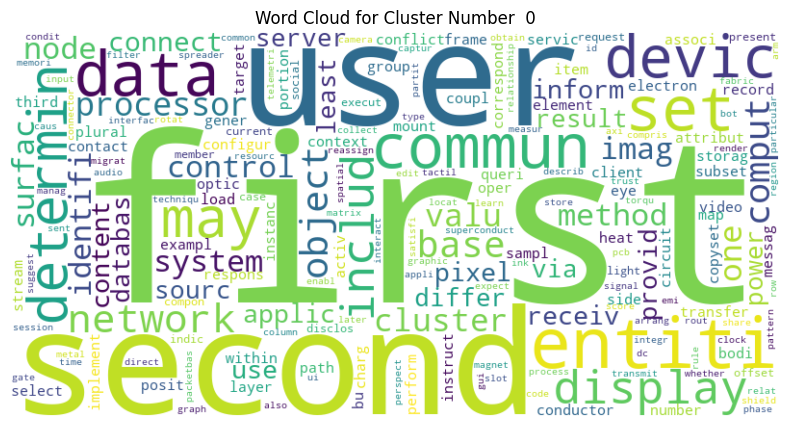

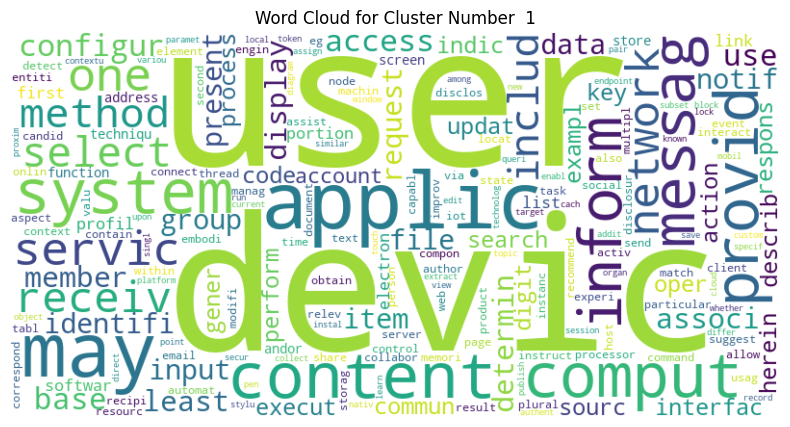

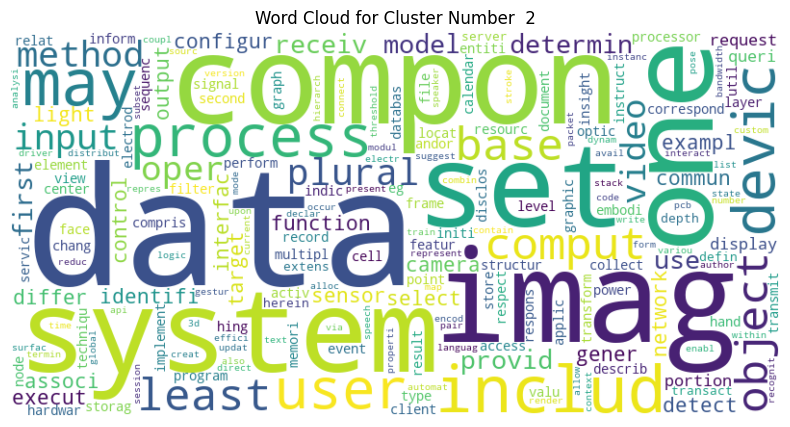

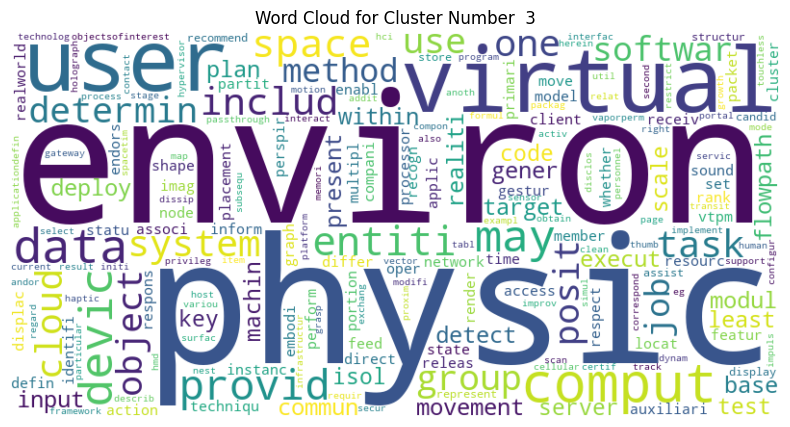

In [23]:
for i in range(num_clusters):
    cvec = CountVectorizer()
    X_cv = cvec.fit_transform(documents_df['clean'][documents_df['labels'] == i])
    tfidf_vec = TfidfVectorizer()
    X_tfidf_sub = tfidf_vec.fit_transform(documents_df['clean'][documents_df['labels'] == i])
    trms = tfidf_vec.get_feature_names_out()

    # Sum the TF-IDF scores for each term across all documents
    tfidf_scores = np.array(X_tfidf_sub.sum(axis=0)).flatten()
    
    term_scores_dict = dict(zip(trms, tfidf_scores))
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_scores_dict)
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Cluster Number  ' + str(i))
    plt.show()
    print('\n''\n''\n''\n''\n')

## Web  scraping

- Useful reference: https://www.w3schools.com/html/

In [24]:
import requests
from bs4 import BeautifulSoup

url = "https://patents.google.com/patent/US8963812B2"
page = requests.get(url)
htmlpage = BeautifulSoup(page.content, 'html.parser')
page.close()


In [25]:
#list(htmlpage) ## visualize the entire html

In [26]:
## get html components
list(list(list(htmlpage.children)[2].children)[1].children)[11]

<meta content="
     A method and apparatus for displaying a reflective image in response to light emitted from an emissive display is disclosed. An apparatus includes an emissive display, a processor in communication with the emissive display, and an electronic cover proximate to the emissive display. The electronic cover includes a passive display layer having a plurality of passive display elements and a photosensitive layer responsive to emitted light from the emissive display. A method includes forming an emitted light image on the emissive display and exposing the photoconductor layer of the electronic cover to an emitted light image, causing the plurality of passive display elements to form a reflective image on the passive display layer so that the reflective image corresponds to the displayed image. 
   
   " name="description"/>

## Lab 10. Part 1 (code-along): Customer complaint analysis

- A financial organization is planning to automate the way they are dealing with customer complaints
- Your goal: design an algorithm to sort customer complaints into groups

In [27]:
# Import data
data = pd.read_csv('../data/complaints02.csv')
data

,Consumer_complaint
0,I have sent plenty of letters asking this debt...
1,"Hi Cfpb, I noticed inquiries on my credit repo..."
2,"Contacted creditor "" XXXX XXXX bank '' and the..."
3,I have called Target to rectify my issue. Targ...
4,I have a state tax lien that was paid in full ...
...,...
5996,I was attempting to deposit a check using the ...
5997,An account was opened with XXXX XX/XX/XXXX it ...
5998,XXXX XXXX AND XXXX XXXX HAS INFORMATION THAT D...
5999,My XX/XX/XXXX mortgage payment is being report...


In [28]:
# Extract the text column (assuming it is the first column)
documents = data.iloc[:, 0].tolist()

# Initialize stop words and stemmer
stop_words = set(stopwords.words('english')).union({"xxxx", "xxxxxxxx"})## additional/special stop words
stemmer = PorterStemmer()

# Function to clean text
def clean_text(doc):
    # Convert to lower case
    doc = doc.lower()
    # Remove punctuation
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words and perform stemming
    doc = ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(doc) if word not in stop_words])
    return doc

# Clean the documents
cleaned_documents = [clean_text(doc) for doc in documents]

data['clean'] = [clean_text(doc) for doc in documents]
print(data.loc[1]['Consumer_complaint'])
print('__________')
print(data.loc[1]['clean'])


Hi Cfpb, I noticed inquiries on my credit report that I am not familiar with. I was a victim of the XXXX inquiry issue. I spoke with XXXX and they are not helping at all. I know for a fact that no one has my SSN or personal information. I had over an XXXX credit score all my life and would like these inquiries removed since I do n't recognize them. 

Best Regards, XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX Bank XXXX XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX  XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX  XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX XXXX XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX
__________
hi cfpb notic inquiri credit report familiar victim inquiri issu spoke help know fact one ssn person inform credit score life would like inquiri remov sinc nt recogn best regard bank


In [29]:
# Vectorization using CountVectorizer with Bi-grams
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(cleaned_documents)

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_documents)

#tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=count_vectorizer.get_feature_names_out())
X_tfidf.shape

(6001, 259387)

In [30]:
vocab2 = pd.DataFrame({'Number' : list(count_vectorizer.vocabulary_.values()), 'Key' : list(count_vectorizer.vocabulary_.keys())})
vocab2.sort_values(by = 'Number', inplace = True, ignore_index=True)
vocab2['Freq'] = np.array(X_count.todense()).sum(axis = 0)

In [31]:
## most frequent terms
vocab2.sort_values(by = 'Freq', ignore_index=True, ascending=False).loc[:500].head(15)

,Number,Key,Freq
0,10861,account,10746
1,65597,credit,10692
2,196199,report,8825
3,170655,payment,6185
4,41882,call,5754
5,121673,inform,5113
6,138152,loan,4533
7,189283,receiv,3986
8,253943,would,3873
9,232450,time,3811


In [32]:
X_tfidf.shape
### way too many features

(6001, 259387)

Do not immediately attempt PCA - it may take a long time to compute
``` python
pca = PCA()
pca.fit(X)
Xpc = pca.transform(X)
plt.plot(pca.explained_variance_ratio_.cumsum())```

- Shortcut: use a subset of features with highest variances



In [33]:
X = np.array(X_tfidf.todense())
X.shape

(6001, 259387)

In [34]:
### Let's just remove low-variance terms
variances = X.var(axis = 0)

In [35]:
variances.shape

(259387,)

In [36]:
X_reduced = X[:, variances > 0.0002]
X_reduced.shape

(6001, 353)

In [37]:
vocab_reduced = vocab2.loc[variances > 0.0002]
vocab_reduced.sort_values('Freq', ascending = False).head(15)

,Number,Key,Freq
10861,10861,account,10746
65597,65597,credit,10692
196199,196199,report,8825
170655,170655,payment,6185
41882,41882,call,5754
121673,121673,inform,5113
138152,138152,loan,4533
189283,189283,receiv,3986
253943,253943,would,3873
232450,232450,time,3811


In [38]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_reduced)
ClusterID = KMeans(n_clusters=4, random_state=42).fit_predict(X_reduced)
print(pd.Series(ClusterID).value_counts())

2    3045
3    1672
1    1049
0     235
dtype: int64


In [39]:
def decode_clusters(n, top_k=10):
    xdf = pd.DataFrame({'f':X_reduced[ClusterID == n, :].sum(axis = 0), 'w':vocab_reduced['Key']})
    xdf.sort_values(by = 'f', inplace = True, ignore_index=True, ascending = False)
    if xdf.loc[:top_k, 'f'].values.sum() > 0: 
        print(xdf.loc[:top_k, 'w'].values)
        term_score_dict = {}
        xdf = xdf.loc[:top_k]
        for i in range(xdf.shape[0]):
            term_score_dict.update({xdf['w'][i]:xdf['f'][i]})
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_score_dict)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud for Cluster Number  ' + str(n))
        plt.show()
        print('\n''\n''\n''\n''\n')
        


['payment' 'loan' 'late' 'mortgag' 'pay' 'account' 'month' 'call' 'would'
 'time' 'credit' 'make' 'due' 'made' 'told' 'interest' 'receiv' 'paid'
 'day' 'report' 'bank' 'year' 'servic' 'navient' 'amount' 'compani']


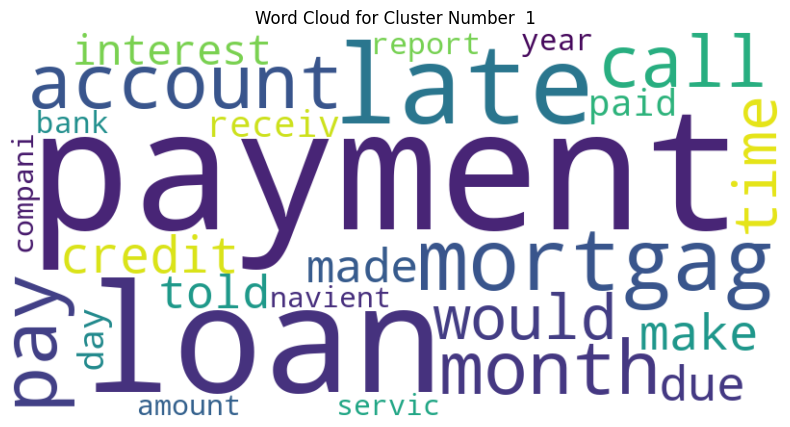

In [40]:
decode_clusters(1, 25)

##### How would you describe each group of complaints, based on the key words?

## Embeddings

In [41]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=[doc.split() for doc in cleaned_documents], 
                          vector_size=1000, window=5, min_count=5)

- We can use w2v to explore the similarity of words

In [42]:
words = list(word2vec_model.wv.index_to_key)[:100]
list(word2vec_model.wv.index_to_key)[:10]

['account',
 'credit',
 'report',
 'payment',
 'call',
 'inform',
 'loan',
 'receiv',
 'would',
 'time']

In [43]:
## visualize word similarity for the top 100 tokens (by the frequency)
word_embeddings = word2vec_model.wv[words]
#word_embeddings

c:\users\vskor\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\users\vskor\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


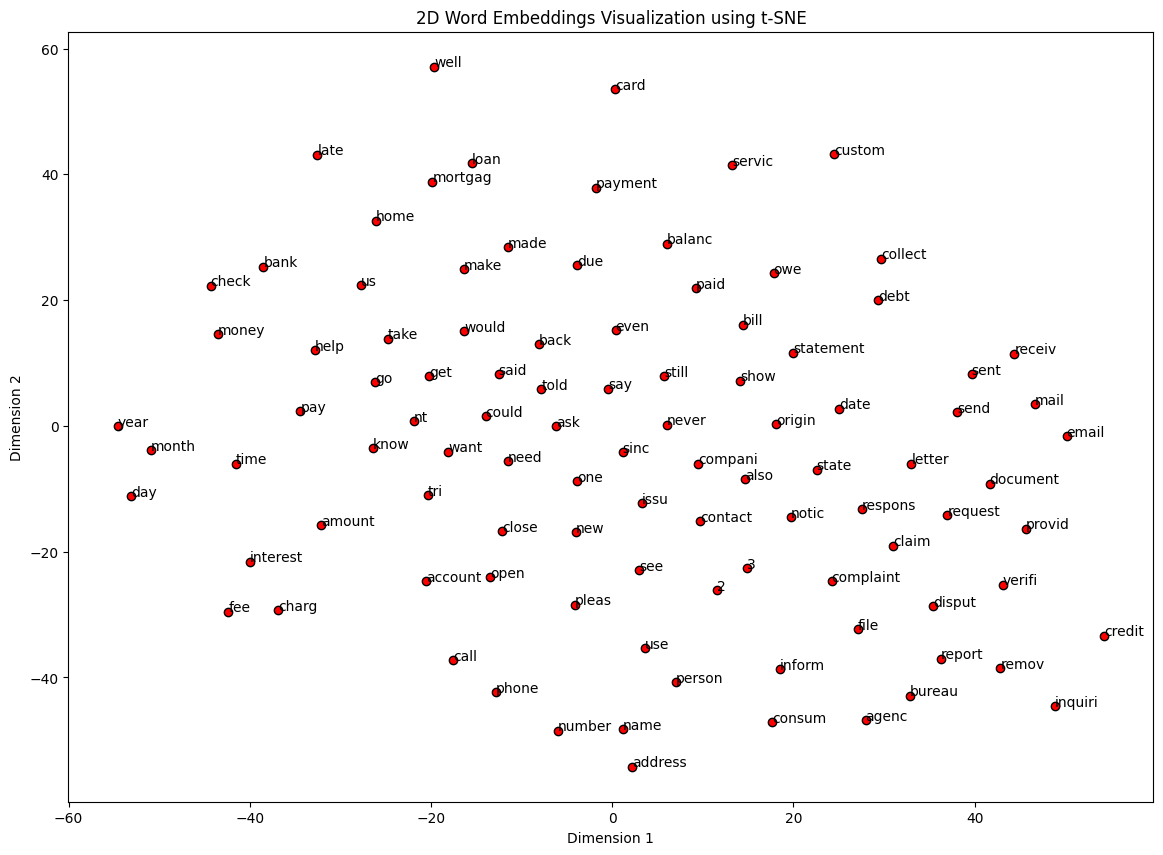

In [44]:
# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_embeddings_2d = tsne.fit_transform(word_embeddings)[:100,:]

# Plot the embeddings
plt.figure(figsize=(14, 10))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1], edgecolors='k', c='r')

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))

plt.title('2D Word Embeddings Visualization using t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

### Create a feature array from word2vec

In [45]:
def document_vector(doc):
    # Remove out-of-vocabulary words 
    ##(keep in mind that if you train w2v on a training set, your test set may contain new words)
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    # Calculate the mean of word vectors
    ## to represent a document as a single vector (a row in a table)
    return np.mean(word2vec_model.wv[doc], axis=0)

# Create feature vectors for each document
X_embed = np.array([document_vector(doc) for doc in cleaned_documents])
X_embed.shape

(6001, 1000)

### Find similar and different documents

In [46]:
data['Consumer_complaint'][0]

'I have sent plenty of letters asking this debt collection agency to verify my debt they will not respond to me.'

In [47]:
data['Consumer_complaint'][1]

"Hi Cfpb, I noticed inquiries on my credit report that I am not familiar with. I was a victim of the XXXX inquiry issue. I spoke with XXXX and they are not helping at all. I know for a fact that no one has my SSN or personal information. I had over an XXXX credit score all my life and would like these inquiries removed since I do n't recognize them. \n\nBest Regards, XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX Bank XXXX XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX  XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX  XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX XXXX XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX"

In [48]:
cosine_similarity(X_embed[[0,1],:])[1,0]

0.98432

In [49]:
#compute the similarities between complaint [0] and other complaints:
similarity = []
for i in range(1,X_embed.shape[0]):
    similarity.append(cosine_similarity(X_embed[[0,i],:])[1,0])

In [50]:
## find the most dissimilar complaint to complaint [0]
(np.array(similarity).argmin(), similarity[np.array(similarity).argmin()])

(5002, 0.59015226)

In [51]:
data['Consumer_complaint'][np.array(similarity).argmin()]

'I wanted to pay extra principal towards my mortgage & I used to do it online periodically whenever I had additional money. \nNationstar changed websites and I was told I can not do it online without also processing early my customary monthly mortgage payment with additional principal. However, they can do it over the phone and will not charge me for it. I agreed and asked for money to go towards principal. \nThey took as I asked additional $ XXXX but did not apply it to principal as I agreed but distributed between escrow interest and principal. I called and they apologized and reprocessed it all to principal ( but deducted {$35.00} towards inspection without my consent ). I was told that in the future I have to modify my next auto payment online to add additional principal. \nI did modify my XX/XX/XXXX auto pay to add additional principal to my monthly mortgage. On XX/XX/XXXX, they took mortgage payment + additional principal. \nBut then on the same day, they processed another mortga

In [52]:
## find the mopst similar complaints
(np.array(similarity[1:]).argmax(), similarity[np.array(similarity[1:]).argmax()])

(4914, 0.96310633)

In [53]:
data['Consumer_complaint'][np.array(similarity[1:]).argmax()]

'Columbia Recovery Group DBA XXXX XXXX sent us a letter on XX/XX/XXXX, which we received on XX/XX/XXXX, stating they are collecting on behalf of a landlord {$240.00}. They attached a move out inspection report that was falsely altered after we signed it. We replied by certified mail on XX/XX/XXXX informing XXXX XXXX that we dispute this alleged debt, that we demand verification of these charges within 30 days of receipt of this dispute letter, or else, provide written clearance of this debt. We attached copies of our original signed move-out inspection reports that show no damages to the unit. Where in fact the landlord owe us the damage deposit minus utilities. \n\nXXXX XXXX did not respond with written clearance of debt. Nor did they provide verification of the alleged debt. XXXX XXXX proceeded to contact us by phone and email, harassing and threatening us verbally. On XX/XX/XXXX, XXXX XXXX emailed us requesting payment, did not provide verification, and then on the phone threatened 

### Your Turn:

#### Build a K-means model using word2vec vectorization

- What parameters should you consider in designing your modeling experiments?

In [54]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_embed)
ClusterID = KMeans(n_clusters=4, random_state=42).fit_predict(X_embed)
print(pd.Series(ClusterID).value_counts())

2    2506
0    2293
3    1067
1     135
dtype: int64


['account' 'payment' 'credit' 'report' 'loan' 'bank' 'xxxx2019' 'call'
 'amount' 'balanc' 'day' 'charg' 'debt' 'receiv' 'card' 'credit report'
 'paid' 'pay' 'would' 'month' 'told' 'compani' 'inform' 'collect' 'time'
 'fee']


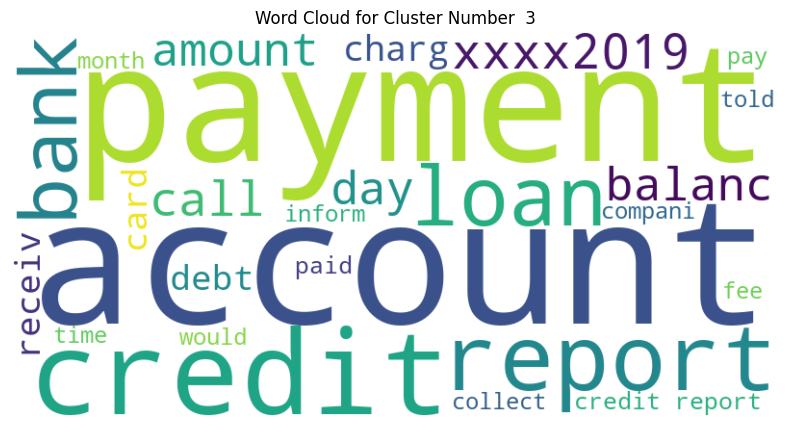

In [55]:
decode_clusters(3, 25)

## Lab 10. Part 2 (code-along): Sentiment Analysis

- The FinancialPhraseBank dataset `all-data.csv` contains the sentiments for financial news headlines from the perspective of a retail investor. The dataset contains two columns, "Sentiment" and "News Headline". The sentiment can be negative, neutral or positive.

- https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

#### Train a classification to determine sentiments in new headlines

In [56]:
# Import data
sentiment = pd.read_csv('../data/all-data.csv', encoding ='latin1', header = None, names = ['label', 'text'])
sentiment.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [57]:
# Extract the text column (assuming it is the first column)
documents = sentiment['text'].tolist()
documents[:3]

['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
 'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .',
 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .']

In [58]:
# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to clean text
def clean_text(doc):
    # Convert to lower case
    doc = doc.lower()
    # Remove punctuation
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words and perform stemming
    doc = ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(doc) if word not in stop_words])
    return doc

# Clean the documents
cleaned_documents = [clean_text(doc) for doc in documents]

sentiment['clean'] = [clean_text(doc) for doc in documents]
print(sentiment.loc[1]['text'])
print('__________')
print(sentiment.loc[1]['clean'])

Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
__________
technopoli plan develop stage area less 100000 squar meter order host compani work comput technolog telecommun statement said


In [59]:
## Remove rows that contain no clean text. Text cleaning may result in some documents being empty.

sentiment = sentiment[sentiment['clean']!='']
cleaned_documents = sentiment['clean'].tolist()

In [60]:
# Vectorization using CountVectorizer with Bi-grams
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(cleaned_documents)

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_documents)

#tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=count_vectorizer.get_feature_names_out())
X_tfidf.shape

(4845, 51014)

In [61]:
vocab2 = pd.DataFrame({'Number' : list(count_vectorizer.vocabulary_.values()), 'Key' : list(count_vectorizer.vocabulary_.keys())})
vocab2.sort_values(by = 'Number', inplace = True, ignore_index=True)
vocab2['Freq'] = np.array(X_count.todense()).sum(axis = 0)
## most frequent terms
vocab2.sort_values(by = 'Freq', ignore_index=True, ascending=False).loc[:500].head(15)

,Number,Key,Freq
0,17420,eur,1016
1,11670,compani,971
2,33226,oper,571
3,40500,said,544
4,30606,mn,515
5,20260,finnish,513
6,40744,sale,501
7,30304,million,441
8,42345,share,438
9,37161,profit,430


In [62]:
# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=[doc.split() for doc in cleaned_documents], 
                          vector_size=1000, window=5, min_count=1, workers=4)

In [63]:
# Create feature array from word embeddings
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    # Calculate the mean of word vectors
    return np.mean(word2vec_model.wv[doc], axis=0)

# Create feature vectors for each document
X = np.array([document_vector(doc) for doc in cleaned_documents])
X.shape

(4845, 1000)

In [64]:
## train a classifier

In [65]:
y = sentiment['label'].to_numpy()

In [66]:
sentiment['label'].value_counts()

neutral     2878
positive    1363
negative     604
Name: label, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=400)

In [69]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.36      0.11      0.16       180
     neutral       0.63      0.91      0.74       847
    positive       0.41      0.16      0.23       427

    accuracy                           0.59      1454
   macro avg       0.47      0.39      0.38      1454
weighted avg       0.53      0.59      0.52      1454



In [70]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[ 19, 123,  38],
       [ 13, 775,  59],
       [ 21, 338,  68]], dtype=int64)

### Your Turn:

1. **What did we do wrong?** Hint: train-test split must be performed prior to feature transformation
2. How can you **improve** model performance?
